# 鞍点・プラトーの可視化

In [ ]:
try:
    from google.colab import files
    print('Google Colab. 上での実行です')
    print('「ファイルを選択」から、notebook フォルダにある myplotly.py を選択し、アップロードしてください')
    print('===========')
    files.upload()
except:
    print('ローカル環境での実行です')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from pylab import * #コンタ描画用
import myplotly

In [ ]:
def numerical_diff(f, x):
    """
    数値微分を行う関数
    """
    h = 1e-4
    return (f(x+h) - f(x-h))/ (2*h)

## 鞍点（saddle point）とは
* 鞍点とは、停留点(stationary points)のうち、極大値(local maximum)でも極小値(local minimum)でもない点のこと。
* 通常の勾配法では、勾配が$0$になるとそれ以上移動できなくなるため、最小値の探索が終了してしまう。
* 例えば、$f=x^2-y^2$での鞍点では、$x$軸方向の勾配も$y$軸方向の勾配も$0$。どちらも勾配が$0$だが、その意味が違う。$x$軸方向の勾配が$0$になるのは、$x$軸方向でみると鞍点が極小値になるため。一方、$y$軸方向の勾配が$0$になるのは、$y$軸方向でみると鞍点が極大値になるため。
* 山の表面を転がるボールで考えた時、鞍点に行きつく前のボールの軌道がどうなっているかというと、山の頂上から稜線に沿って鞍点までまっすぐに転がってくるということになる。少しでも山の稜線から外れれば、$y$軸方向に勾配がついて、山を下り始めるはずなので。

## 鞍点の例 $f(x,y)=x^2-y^2$

#### 関数$f(x,y)$の描画

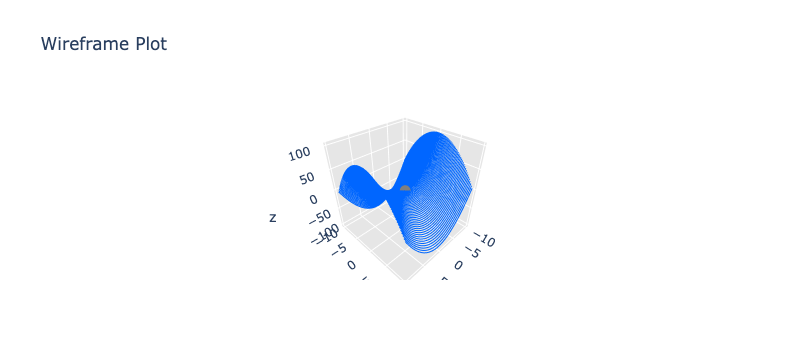

In [ ]:
def fxy(x, y):
    return x**2 - y**2

#目的関数の値をつくる
axis_x = np.arange(-10,10,0.25)
axis_y = np.arange(-10,10,0.25)
mx, my = meshgrid(axis_x, axis_y) 
mz = fxy(mx, my)

# 3次元で描画
myplotly.graph3d(mx, my, mz, point_x=0,point_y=0,point_z=fxy(0,0), markersize=3)

In [ ]:
def fx1(x):
    """
    f(x,y)におけるy=0の断面の関数
    f(x,y)をy=0で固定すると、f(x,y)=x^2になる
    """
    return x**2 

def f1y(y):
    """
    f(x,y)におけるx=0の断面の関数
    f(x,y)をx=0で固定すると、f(x,y)=y^2になる
    """
    return y**2

0.0


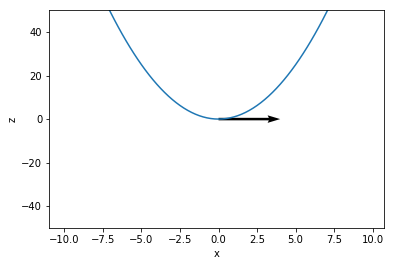

0.0


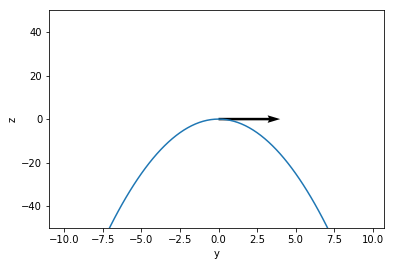

In [ ]:
def add_vec(f, x):
    # 矢印（ベクトル）の始点
    X = x
    Y = f(x)

    # 矢印（ベクトル）の成分
    diff = numerical_diff(f, x)
    print(diff)
    U = 1 if diff  >=0  else -1
    V = np.abs(diff)

    # 矢印（ベクトル）の描画
    plt.quiver(X,Y,U,V,angles='xy',scale_units='xy',scale=0.25)
    

# 偏微分を行う場所の指定
x = 0
y = 0

# x方向の偏微分
mz = fxy(axis_x, y)
add_vec(fx1, x)
plt.plot(axis_x, mz)
plt.xlabel("x")
plt.ylabel("z")
plt.ylim(-50,50)
plt.show()

# y方向の偏微分
mz = fxy(x, axis_y)
add_vec(f1y, y)
plt.plot(axis_y, mz)
plt.xlabel("y")
plt.ylabel("z")
plt.ylim(-50,50)
plt.show()

## プラトー(plateau)とは
プラトーとは、ほとんど勾配のない地帯のこと。学習が進まない停滞期に陥ることになる。

## プラトーを説明するための関数(極小値を持たないことに注意)
$f(x,y)=x^3+(x+1)^2+y^3+(y+1)^2$

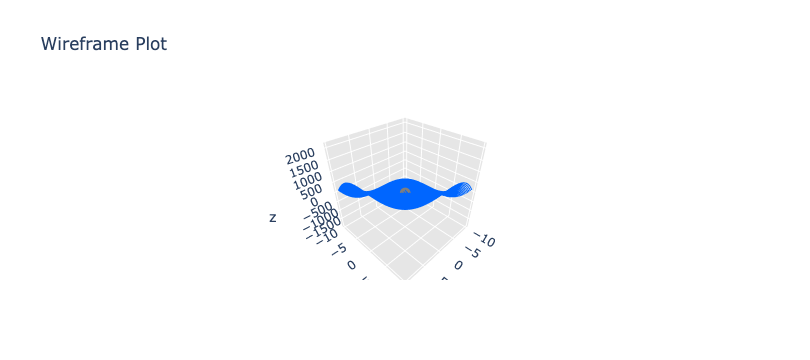

In [ ]:
def fxy(x, y):
    return x**3 + (x+1)**2 +y**3 +(y+1)**2

#目的関数の値をつくる
axis_x = np.arange(-10,10,0.25)
axis_y = np.arange(-10,10,0.25)
mx, my = meshgrid(axis_x, axis_y) 
mz = fxy(mx, my)

# 3次元で描画
myplotly.graph3d(mx, my, mz, point_x=0,point_y=0,point_z=fxy(0,0), markersize=3)

In [ ]:
def add_vec(f, x):
    # 矢印（ベクトル）の始点
    X = x
    Y = f(x)

    # 矢印（ベクトル）の成分
    diff = numerical_diff(f, x)
    print(diff)
    U = 1 if diff  >=0  else -1
    V = np.abs(diff)

    # 矢印（ベクトル）の描画
    plt.quiver(X,Y,U,V,angles='xy',scale_units='xy',scale=0.25)
    

2.0000000099995585


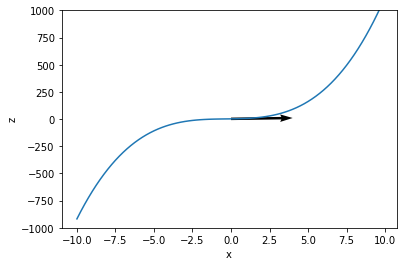

2.0000000099995585


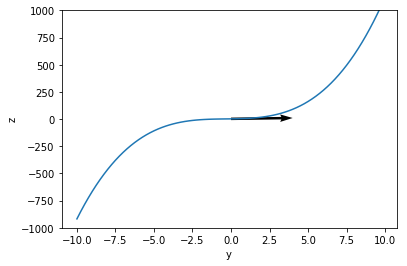

In [ ]:
def fx1(x):
    """
    f(x,y)におけるy=0の断面の関数
    f(x,y)をy=0で固定すると、f(x,y)=x^3+(x+1)^2+1^2になる
    """
    return x**3+(x+1)**2+1 

def f1y(y):
    """
    f(x,y)におけるx=0の断面の関数
    f(x,y)をx=0で固定すると、f(x,y)=y^3+(y+1)^2+1^2になる
    """
    return y**3+(y+1)**2+1

    
# 偏微分を行う場所の指定
x = 0
y = 0

# x方向の偏微分
mz = fxy(axis_x, y)
add_vec(fx1, x)
plt.plot(axis_x, mz)
plt.xlabel("x")
plt.ylabel("z")
plt.ylim(-1000,1000)
plt.show()

# y方向の偏微分
mz = fxy(x, axis_y)
add_vec(f1y, y)
plt.plot(axis_y, mz)
plt.xlabel("y")
plt.ylabel("z")
plt.ylim(-1000,1000)
plt.show()